This assignment will use the dataset from Lab 12, which was 311 service requests from October 1 and 2, 2023.

Write a piece of code that plots overlapping histograms of the hours at which calls come in about rodents and the hours at which calls come in about commercial noise. Your plot should have a title, x and y axis labels, and a legend.

Hint:
Rodent complaints have Rodent in the Complaint Type column, while commerical noise complaints have Noise - Commercial in the Complaint Type column.

1) How do the two histograms differ? Guess why this might be the case.

2) What happens if you add density = True as a parameter to both histograms? Why?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv("oct1_oct2_2023_311_Service_Requests_from_2010_to_Present.csv", parse_dates =["Created Date"])

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_83806/4277344211.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv("oct1_oct2_2023_311_Service_Requests_from_2010_to_Present.csv", parse_dates =["Created Date"])
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_83806/4277344211.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calls = pd.read_csv("oct1_oct2_2023_311_Service_Requests_from_2010_to_Present.csv", parse_dates =["Created Date"])


In [4]:
calls.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,58987955,2023-10-02 23:59:56,10/03/2023 01:01:46 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,120-01 111 AVENUE,...,NaN,40.680802,-73.820317,"(40.68080187760374, -73.82031686786587)",24016.0,62.0,3.0,46.0,64.0,64.0
1,59452871,2023-10-02 23:59:52,10/08/2023 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,Unsanitary Condition,Mold,Apartment,11238.0,475 ST MARKS AVENUE,...,NaN,40.676439,-73.958465,"(40.67643873731535, -73.95846474391197)",13829.0,16.0,2.0,48.0,49.0,49.0
2,58993955,2023-10-02 23:59:34,10/03/2023 12:44:23 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10453.0,64 EAST 183 STREET,...,NaN,40.858271,-73.902463,"(40.858271448590614, -73.90246273872681)",11606.0,6.0,5.0,29.0,29.0,29.0
3,58989586,2023-10-02 23:59:29,10/03/2023 12:42:19 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11224.0,2832 WEST 23 STREET,...,NaN,40.577620,-73.990378,"(40.577619686746154, -73.99037761720334)",18184.0,21.0,2.0,45.0,35.0,35.0
4,58991785,2023-10-02 23:59:19,10/03/2023 02:21:36 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10473.0,917 OLMSTEAD AVENUE,...,NaN,40.825441,-73.852695,"(40.82544129204551, -73.85269492494044)",11611.0,58.0,5.0,31.0,26.0,26.0


In [9]:
calls["Complaint Type"].unique()

array(['Blocked Driveway', 'Unsanitary Condition', 'Noise - Commercial',
       'Noise - Residential', 'Illegal Parking', 'Animal-Abuse',
       'General Construction/Plumbing', 'Noise - House of Worship',
       'Noise - Street/Sidewalk', 'UNSANITARY CONDITION',
       'Street Condition', 'Water System', 'Dirty Condition',
       'Illegal Tree Damage', 'Noise - Park', 'Noise', 'Damaged Tree',
       'Lost Property', 'Rodent', 'Building/Use', 'ELECTRIC',
       'Street Light Condition', 'Asbestos', 'Abandoned Vehicle',
       'Noise - Vehicle', 'PAINT/PLASTER', 'GENERAL', 'FLOORING/STAIRS',
       'Paint/Plaster', 'Electronics Waste Appointment',
       'Flooring/Stairs', 'HEAT/HOT WATER', 'Elevator', 'Heat/Hot Water',
       'Violation of Park Rules', 'DOOR/WINDOW', 'Encampment',
       'Door/Window', 'School Maintenance', 'Plumbing',
       'Vendor Enforcement', 'Sewer', 'Missed Collection',
       'Consumer Complaint', 'PLUMBING', 'WATER LEAK',
       'Sewer Maintenance', 'Water Lea

In [12]:
rodent_filter = calls["Complaint Type"] == "Rodent"
rodent_df = calls[rodent_filter]
rodent_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
51,58993169,2023-10-02 23:50:20,10/02/2023 11:50:20 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Commercial Building,11207.0,2348 PITKIN AVENUE,...,NaN,40.673398,-73.885660,"(40.673397612863766, -73.8856597541274)",17214.0,45.0,2.0,37.0,47.0,47.0
57,58996120,2023-10-02 23:48:54,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10014.0,118 CHRISTOPHER STREET,...,NaN,40.733180,-74.005604,"(40.73318038054144, -74.00560360888781)",12077.0,57.0,4.0,10.0,3.0,3.0


In [15]:
commercial_filter = calls["Complaint Type"] == "Noise - Commercial"
commercial_df = calls[commercial_filter]
commercial_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
2,58993955,2023-10-02 23:59:34,10/03/2023 12:44:23 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10453.0,64 EAST 183 STREET,...,NaN,40.858271,-73.902463,"(40.858271448590614, -73.90246273872681)",11606.0,6.0,5.0,29.0,29.0,29.0
14,58991081,2023-10-02 23:57:31,10/03/2023 12:33:29 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,2145 AMSTERDAM AVENUE,...,NaN,40.838811,-73.937677,"(40.8388111804014, -73.93767696356736)",13090.0,47.0,4.0,39.0,21.0,21.0


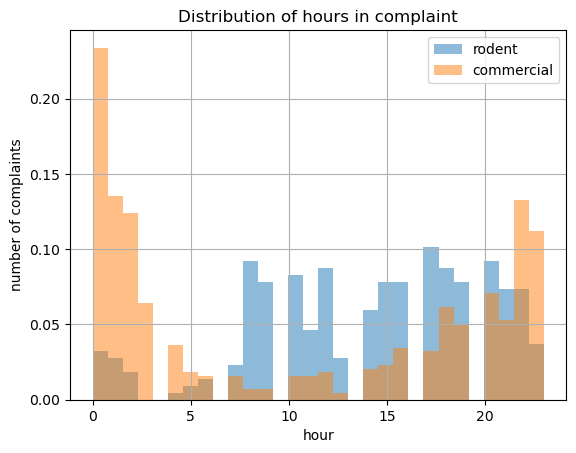

In [23]:
rodent_df["Created Date"].dt.hour.hist(bins = 30, alpha = 0.5, density = "True")
commercial_df["Created Date"].dt.hour.hist(bins = 30, alpha = 0.5, density = "True")
plt.xlabel("hour")
plt.ylabel("number of complaints")
plt.title("Distribution of hours in complaint")
plt.legend(["rodent", "commercial"])